In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
circuits = pd.read_csv('archive/circuits.csv')
race = pd.read_csv('archive/races.csv')
status = pd.read_csv('archive/status.csv')
result = pd.read_csv('archive/results.csv')
world = pd.read_csv('countries.csv')
drivers = pd.read_csv('archive/drivers.csv',parse_dates=['dob'])
constructors = pd.read_csv('archive/constructors.csv')

# Number of circuits in each country

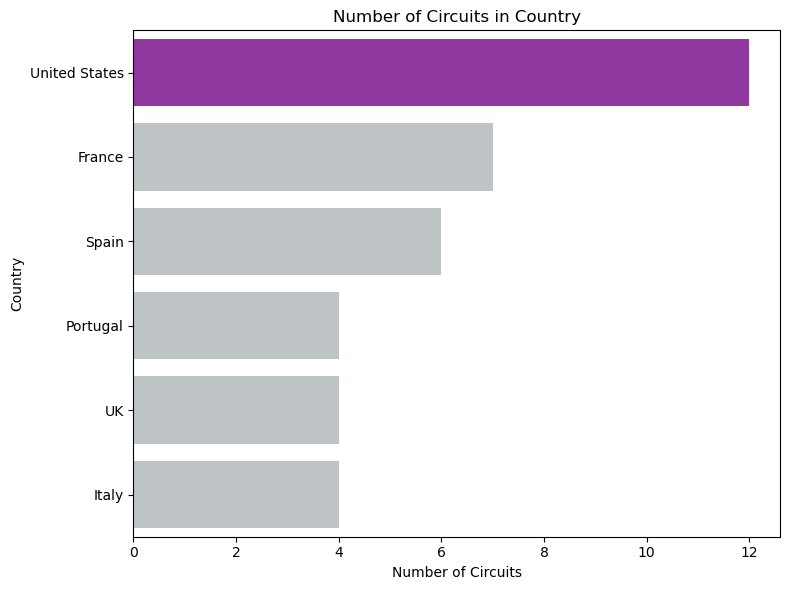

In [3]:
# because I had 'United States' and 'USA' I merged them into one name
 # places['country'].replace(value='United States', to_replace='USA')
circuits['country'] = circuits['country'].replace(value='United States', to_replace='USA')
colors=['#9C27B0','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7']#,'#58D68D','#AED6F1','#CB4335','#009B3A']
circ = circuits['country'].replace(value='United States', to_replace='USA').value_counts().head(6)
plt.figure(figsize=(8, 6))  # Set the figure size as needed
sns.barplot(x=circ.values, y=circ.index, palette=colors)
# circ.nlargest(6,'first').plot(kind='bar')
plt.title('Number of Circuits in Country')
plt.xlabel('Number of Circuits')
plt.ylabel('Country')
# plt.xticks(rotation=65)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

# Number of drivers from each nationality

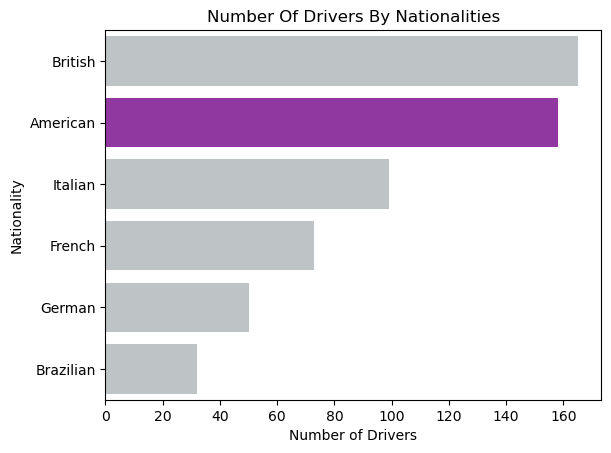

nationality
British      165
American     158
Italian       99
French        73
German        50
Brazilian     32
Name: count, dtype: int64


In [4]:
colors=['#BDC3C7','#9C27B0','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7']#,'#58D68D','#AED6F1','#CB4335','#009B3A']
nationality_counts = drivers['nationality'].value_counts().head(6)  # Top 10 nationalities
sns.barplot(x=nationality_counts.values, y=nationality_counts.index, palette=colors)
plt.title("Number Of Drivers By Nationalities")
plt.xlabel('Number of Drivers')
plt.ylabel('Nationality')
plt.show()
print(nationality_counts)

# Number of circuits in each country

In [5]:
# - Taking care of constructors data, changing nationality to countries names - #

# convert the nationality no country name
nationality_to_country = {
    'British': 'United Kingdom',
    'German': 'Germany',
    'French': 'France',
    'Italian': 'Italy',
    'Japanese': 'Japan',
    'Austrian': 'Austria',
    'Indian': 'India',
    'Dutch': 'Netherlands',
    'Russian': 'Russia',
    'Swiss': 'Switzerland',
    'Irish': 'Ireland',
    'Hong Kong': 'Hong Kong',  # Special Administrative Region of China
    'Brazilian': 'Brazil',
    'Canadian': 'Canada',
    'Mexican': 'Mexico',
    'American': 'United States',
    'Australian': 'Australia',
    'New Zealander': 'New Zealand',
    'South African': 'South Africa',
    'Rhodesian': 'Zimbabwe',  # Rhodesia is now Zimbabwe
    'Belgian': 'Belgium',
    'East German': 'Germany',  # East Germany is now part of Germany
    'Spanish': 'Spain',
    'Malaysian': 'Malaysia'
}
replacments = {'United Kingdom':'UK', 
               'United States':'USA',
               'United Arab Emirates': 'UAE',
               'South Korea': 'Korea'}
constructors['country'] = constructors['nationality'].map(nationality_to_country)
world = world.rename(columns={'Country': 'country', 'Continent': 'continent'})
constructors['country'] = constructors['country'].replace(replacments)


In [6]:
constructors_countries = constructors.groupby('country')['name'].count().reset_index().sort_values(by='name', ascending=False)#.nlargest(5, 'name')
constructors_countries = constructors_countries.rename(columns={'name': 'num_of_constructors'}).nlargest(5, 'num_of_constructors')
constructors_countries

,country,num_of_constructors
20,UK,86
21,USA,39
10,Italy,29
5,France,13
6,Germany,11


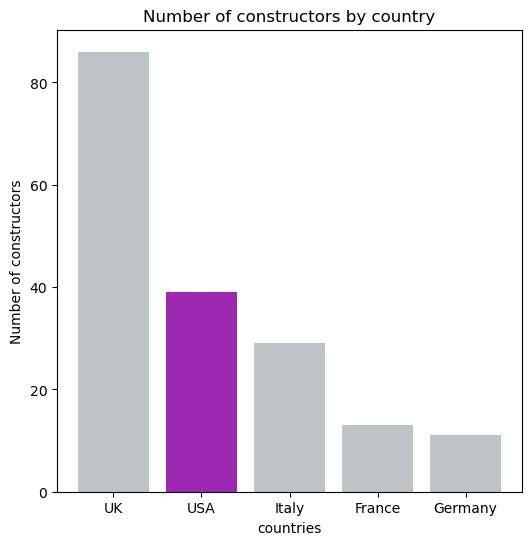

In [7]:
# constructors_countries_ =  constructors_countries.value_counts()
# Create a bar plot
colors=['#BDC3C7','#9C27B0','#BDC3C7','#BDC3C7','#BDC3C7']
plt.figure(figsize=(6, 6))  # Set the figure size as desired
plt.bar(x=constructors_countries['country'], height=constructors_countries['num_of_constructors'],color=colors)

# Adding titles and labels
plt.title('Number of constructors by country')
plt.xlabel('countries')
plt.ylabel('Number of constructors')
plt.xticks(rotation=0)  # Rotate the country names for better readability
# Show the plot
plt.show()

Second part

In [8]:
# merge a few DF to create the necessary DF for calculating drivers' points
result_race = pd.merge(result, race, on='raceId')
race_result_circuit = pd.merge(result_race, circuits, on='circuitId')
driver_result = pd.merge(race_result_circuit, drivers, on='driverId')
# Grouping the drivers by their nationality, and sum the points to get better understanding on who get how much
driver_score_df = driver_result.groupby(['nationality'])['points'].sum().reset_index().sort_values('points',ascending=False).head(12)
driver_score_df.sample() #Just a small sample of the result, to understand what i needed

,nationality,points
7,Brazilian,3423.0


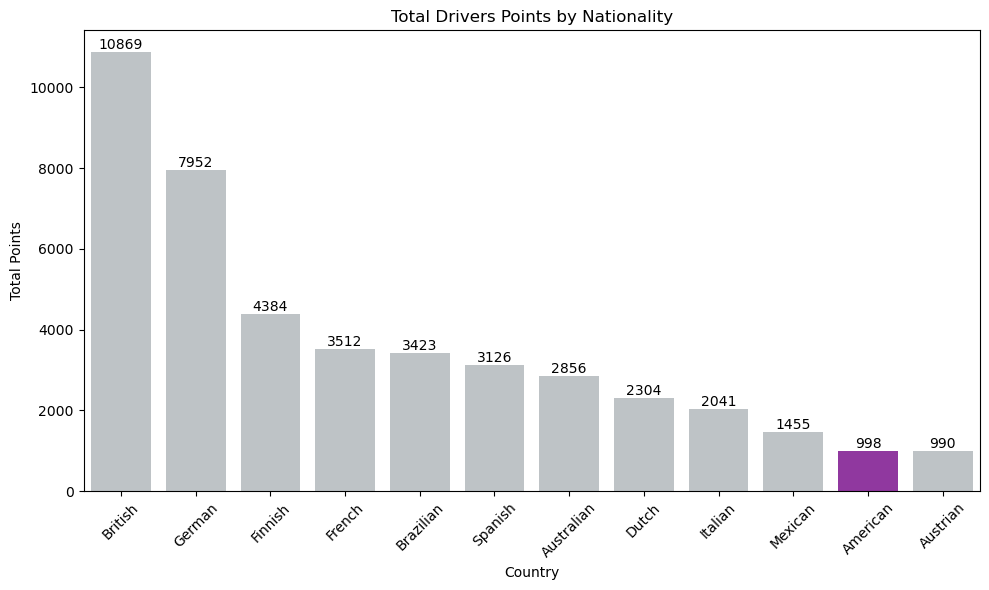

In [9]:

# I used the set of colors like that to mark USA rank compare to the others
colors=['#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#9C27B0','#BDC3C7']

# Useing matplotlib, also for this graph (plt):

plt.figure(figsize=(10, 6))  # Set the figure size as needed
 
ax = sns.barplot(x=driver_score_df['nationality'], y=driver_score_df['points'] ,palette=colors)
# This for loop to get the total number on each bar
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title('Total Drivers Points by Nationality')
plt.xlabel('Country')
plt.ylabel('Total Points')
plt.xticks(rotation=45)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [10]:
r_result = result[['constructorId', 'points','raceId', 'resultId']]
c_constructors = constructors[['constructorId', 'name', 'country']]
merged_constructors_and_result = pd.merge(c_constructors, r_result, on='constructorId')
total_point_const = merged_constructors_and_result.groupby('country')[['points']].sum().round().reset_index().sort_values(by='points', ascending=False)
total_point_const

,country,points
20,UK,16798.0
10,Italy,12335.0
6,Germany,7526.0
1,Austria,6812.0
5,France,2837.0
8,India,1098.0
19,Switzerland,911.0
21,USA,551.0
11,Japan,438.0
9,Ireland,291.0


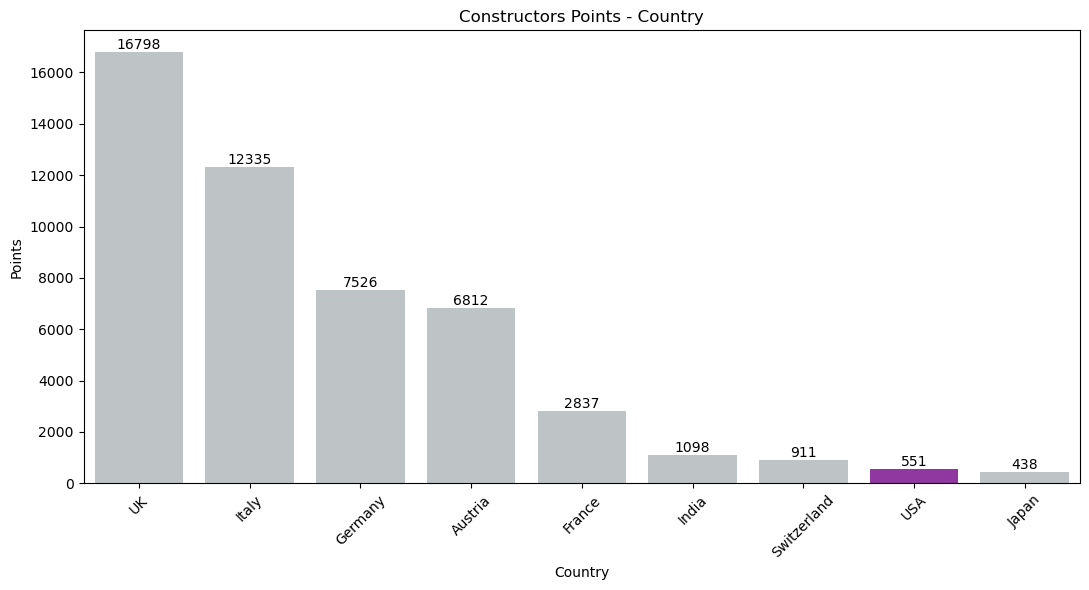

In [11]:
total_point_const=merged_constructors_and_result.groupby('country')['points'].sum().round()
total_point_const = total_point_const.sort_values(ascending=False).nlargest(9)
colors=['#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#9C27B0','#BDC3C7']
plt.figure(figsize=(11, 6))  # Set the figure size as needed

ax = sns.barplot(x=total_point_const.index, 
                 y=total_point_const.values,
                 palette=colors)

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title('Constructors Points - Country')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

Display of the USA success

In [12]:
# convert the nationality column to the countries names
nationality_to_country = {
    'British': 'UK',
    'German': 'Germany',
    'Spanish': 'Spain',
    'Finnish': 'Finland',
    'Japanese': 'Japan',
    'French': 'France',
    'Polish': 'Poland',
    'Brazilian': 'Brazil',
    'Italian': 'Italy',
    'Australian': 'Australia',
    'Austrian': 'Austria',
    'American': 'USA',
    'Dutch': 'Netherlands',
    'Colombian': 'Colombia',
    'Portuguese': 'Portugal',
    'Canadian': 'Canada',
    'Indian': 'India',
    'Hungarian': 'Hungary',
    'Irish': 'Ireland',
    'Danish': 'Denmark',
    'Argentine': 'Argentina',
    'Czech': 'Czech Republic',
    'Malaysian': 'Malaysia',
    'Swiss': 'Switzerland',
    'Belgian': 'Belgium',
    'Monegasque': 'Monaco',
    'Swedish': 'Sweden',
    'Venezuelan': 'Venezuela',
    'New Zealander': 'New Zealand',
    'Chilean': 'Chile',
    'Mexican': 'Mexico',
    'South African': 'South Africa',
    'Liechtensteiner': 'Liechtenstein',
    'Rhodesian': 'Zimbabwe',  # Rhodesia is now Zimbabwe
    'American-Italian': 'United States/Italy',  # Dual nationality, interpretative
    'Uruguayan': 'Uruguay',
    'Argentine-Italian': 'Argentina/Italy',  # Dual nationality, interpretative
    'Thai': 'Thailand',
    'East German': 'Germany',  # East Germany has since reunified with Germany
    'Russian': 'Russia',
    'Indonesian': 'Indonesia',
    'Chinese': 'China'
}

drivers['country'] = drivers['nationality'].map(nationality_to_country)

# A dictionary with the right names for later, so I can replace the countries names
replacments = {'United Kingdom':'UK', 
               'United States':'USA',
               'United Arab Emirates': 'UAE',
               'South Korea': 'Korea'}

# rename the country and continent to lowercase merge the right column name (from world DF)
world = world.rename(columns={'Country': 'country', 'Continent': 'continent'})

# replace the country name to a shorter version using the dictionary above
drivers['country'] = drivers['country'].replace(replacments)


In [13]:
d_result = result[['driverId', 'points', 'resultId','raceId']]
d_driver = drivers[['driverId', 'forename', 'surname' ,'country']]
d_race = race[['raceId', 'year']]
championship = pd.merge(d_driver, d_result, on='driverId')
champ = pd.merge(championship, d_race, on='raceId')

In [14]:
# Calculate the total number of points each driver get in every year to measure who was the winner that year.
years = champ['year'].unique()
champions = {}
for year in years:
    # Filter data for the current year
    data_year = champ.loc[champ['year'] == year]
    # display(data_year)    
    # Group by surname, sum the points, and sort
    driver_points = data_year.groupby(['driverId'])[['points']].sum().reset_index().sort_values(by='points', ascending=False)
    # display(driver_points)    
    # Select the champion (top driver)
    champion = driver_points.iloc[0]
    # display(champion)    
    # Store the champion in the dictionary
    # display(drivers.loc[drivers['driverId'] == champion['driverId']])
    champions[year] = drivers.loc[drivers['driverId'] == champion['driverId']].country.values[0] #champion['driverId']#+ ', ' + champion['forename'] + ' ' + champion['surname']
    # print(champions)
# Convert the champions dictionary to a DataFrame for nicer display if desired
champions_df = pd.DataFrame(list(champions.items()), columns=['Year', 'Champion']).sort_values(by='Year')
champions_df = champions_df['Champion'].value_counts().reset_index()

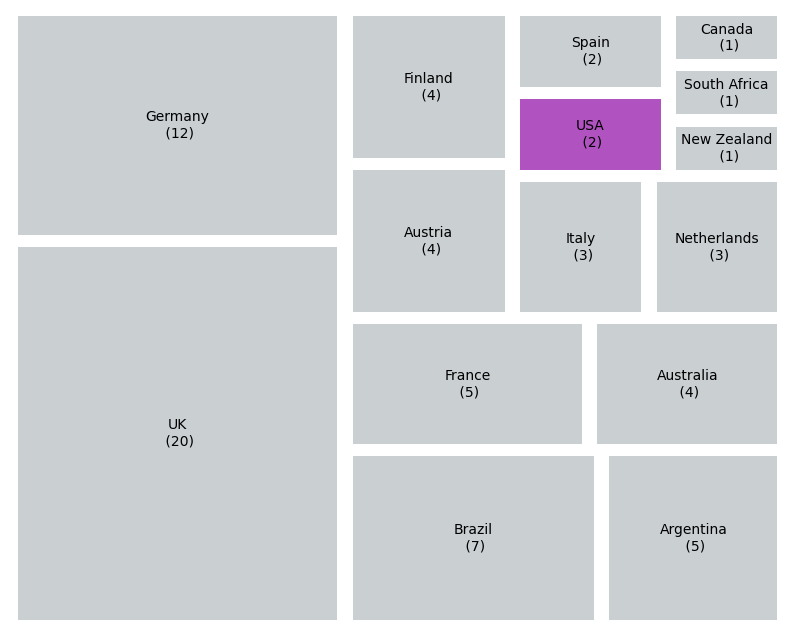

In [15]:
# USA only
import squarify
colors=['#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7',
        '#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7',
        '#9C27B0','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7']

# Create a figure to plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Create a squarify plot without the labels
squarify.plot(sizes=champions_df['count'],alpha=.8, color=colors, pad=True)

# Add labels manually with custom font properties
for rect, (label, count) in zip(ax.patches, zip(champions_df['Champion'], champions_df['count'])):
    x, y, dx, dy = rect.get_x(), rect.get_y(), rect.get_width(), rect.get_height()
    label_text = f"{label}\n ({count})"  # Format the label with the count
    ax.text(x+dx/2, y+dy/2, label_text,
            va='center', ha='center',  # center alignment
            color='black',             # white font color for visibility
            fontname='sans-serif',     # font
            fontsize=10)               # size of the font

# Display the plot
plt.axis('off')
plt.show()